In [10]:
%pylab inline

import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [25]:
def k_means(K, D, iter_limit=None):
    def generate_initial_r():
        result = D[np.random.choice(D.shape[0], K, replace=False), :]
        return result

    def assign_to_groups(r, D):
        result = np.argmin(np.sum((D[:, np.newaxis,:] - r) ** 2, axis=2), axis=1)
        return result

    def compute_centres(C):
        result = np.array([np.mean(D[C == i, :], axis=0) for i in np.unique(C)])
        return result
        
    r = generate_initial_r()
    C = assign_to_groups(r, D)
    nr = compute_centres(C)
    iter = 0
    
    while (r != nr).any() and (iter_limit is None or iter < iter_limit):
        r = nr
        C = assign_to_groups(r, D)
        nr = compute_centres(C)
        iter += 1
    
    return C, nr

In [51]:
def process_image(image, K, iter_limit=None):
    image = imread(image)
    figsize(15, 15)
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)

    
    plt.subplot(1, 2, 2)
    pixels = image.reshape((image.shape[0] * image.shape[1], 3))
    groups, centres = k_means(K, pixels, iter_limit)
    for i in range(pixels.shape[0]):
        pixels[i] = centres[groups[i]]
    new_image = pixels.reshape((image.shape[0], image.shape[1], 3))
    plt.imshow(new_image)
    
    plt.show()

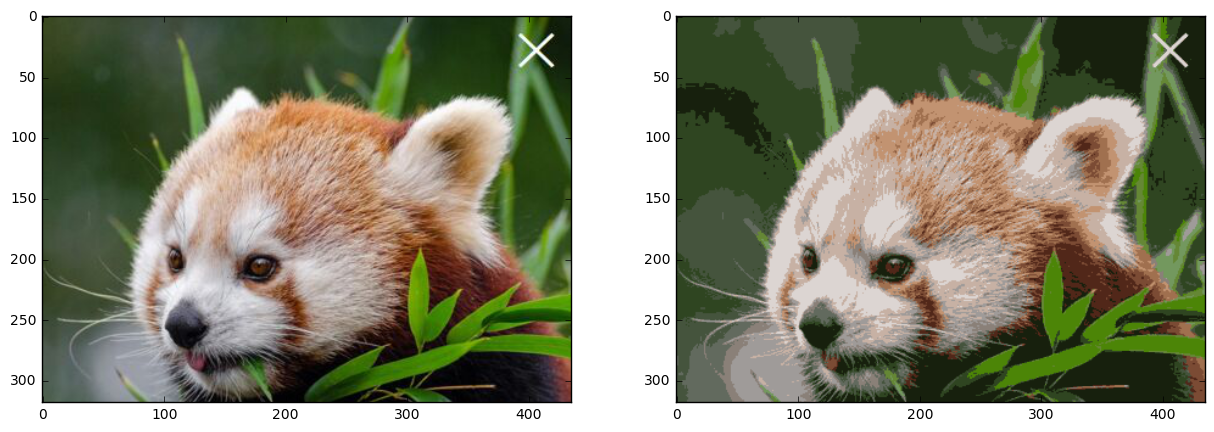

In [55]:
process_image("image_0.jpg", 15, 10)

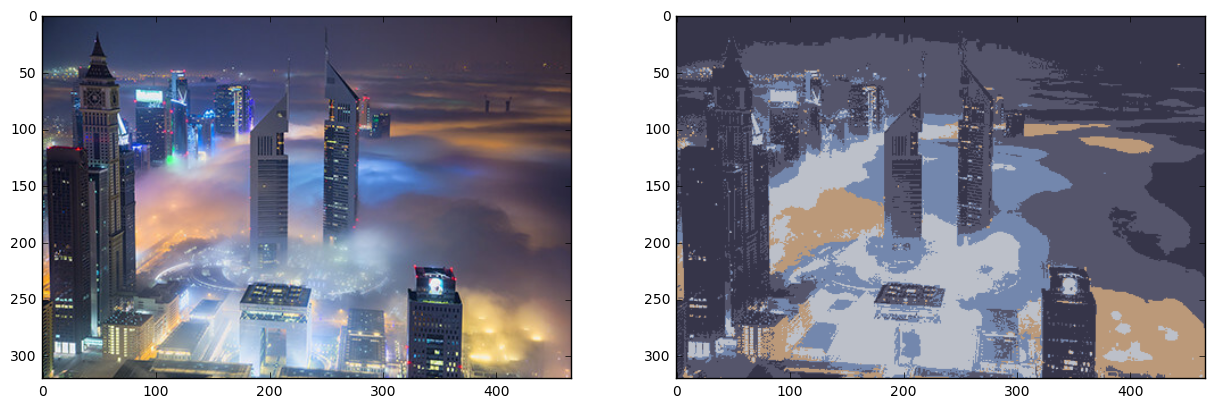

In [60]:
process_image("image_1.jpg", 5, 10)

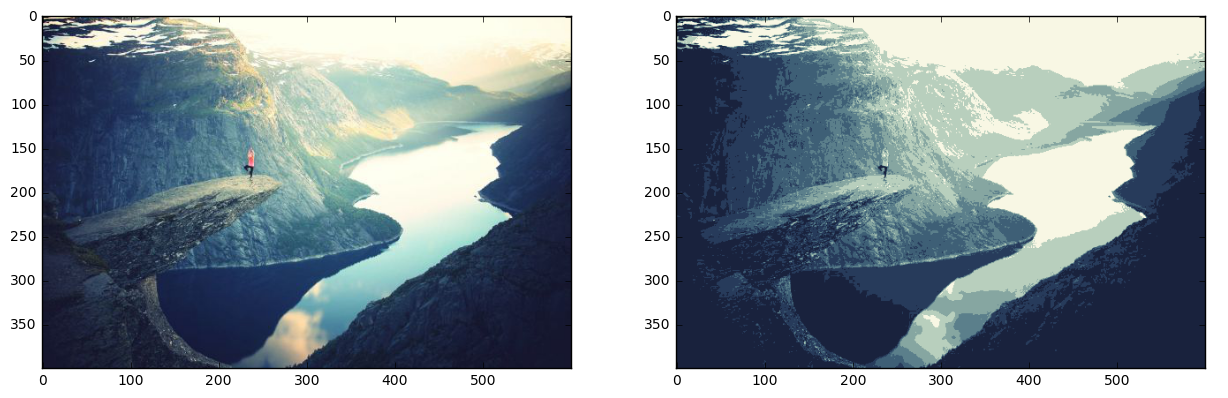

In [62]:
process_image("image_2.jpg", 7, 10)

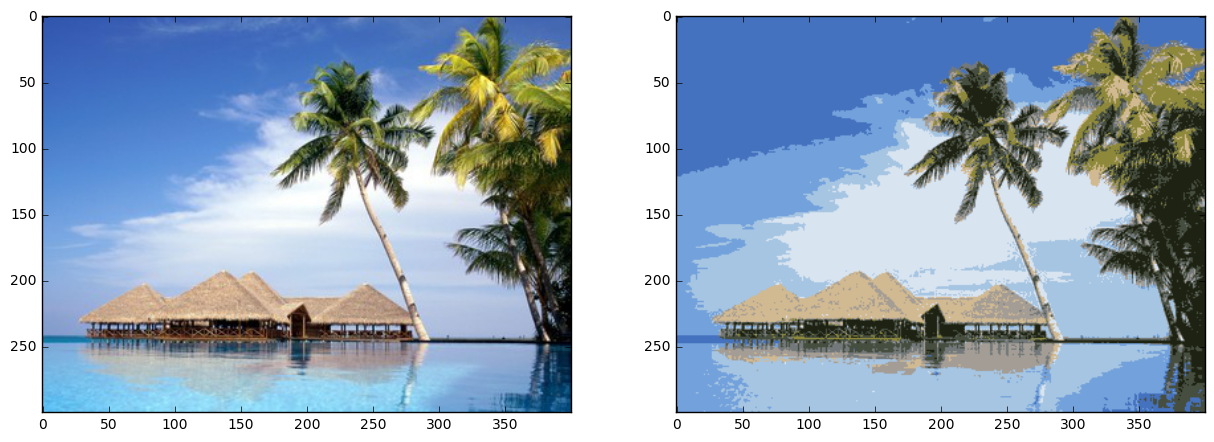

In [64]:
process_image("image_3.jpg", 10, 10)

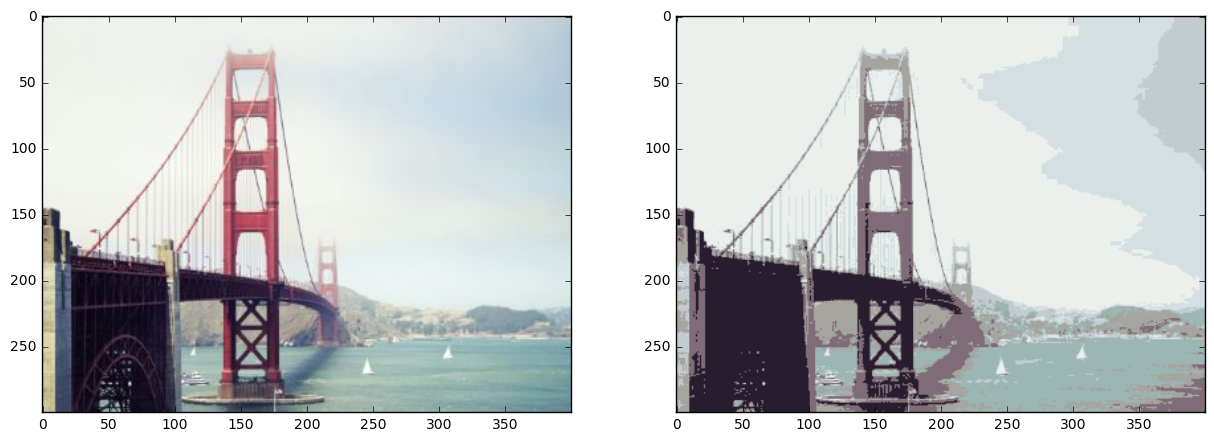

In [68]:
process_image("image_4.jpg", 7, 5)